# 03 Happy Face

![](https://images.unsplash.com/photo-1472162072942-cd5147eb3902?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Ben White](https://unsplash.com/photos/4K2lIP0zc_k)

In [1]:
import pickle
X, y = pickle.load(open("dataset.pkl", "rb"))

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Text(0.5, 1.0, 'unhappy')

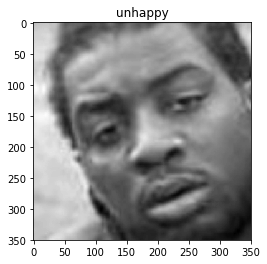

In [8]:
import matplotlib.pyplot as plt
import numpy as np
happiness = ["unhappy", "happy"]

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap="gray")
plt.title(happiness[int(y_train[idx])])

In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_train_flat.shape

(944, 122500)

In [14]:
X_test_flat = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
X_test_flat.shape

(236, 122500)

## I. PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(X_train_flat[:500])

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X_train_pca = pca.transform(X_train_flat)

In [10]:
X_train_pca.shape

(944, 317)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_pca = scaler.fit_transform(X_train_pca)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

/home/vince/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
X_test_pca = pca.transform(X_test_flat)

X_test_pca = scaler.transform(X_test_pca)

print("accuracy with random forest:", rf.score(X_test_pca, y_test))

accuracy with random forest: 0.6313559322033898


## II. ConvNet

In [5]:
X_train.shape

(944, 350, 350)

In [6]:
X_train = X_train/255.
X_test = X_test/255.

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def my_model():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(350,350, 1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=128, activation='relu'))
    # Layer F6
    model.add(Dense(units=64, activation='relu'))
    # Output layer
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    return model

In [11]:
# Instantiate the model
model = my_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 348, 348, 8)       80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 87, 87, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               903296    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Train on 944 samples, validate on 236 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
944/944 [==============================] - 30s 32ms/sample - loss: 0.6938 - acc: 0.5773 - val_loss: 0.6801 - val_acc: 0.5042
Epoch 2/20
944/944 [==============================] - 38s 40ms/sample - loss: 0.6421 - acc: 0.6292 - val_loss: 0.5845 - val_acc: 0.7458
Epoch 3/20
944/944 [==============================] - 27s 29ms/sample - loss: 0.5182 - acc: 0.7701 - val_loss: 0.4592 - val_acc: 0.8008
Epoch 4/20
944/944 [==============================] - 26s 28ms/sample - loss: 0.3807 - acc: 0.8581 - val_loss: 0.2722 - val_acc: 0.9322
Epoch 5/20
944/944 [==============================] - 26s 28ms/sample - loss: 0.1996 - acc: 0.9354 - val_loss: 0.1529 - val_acc: 0.9576
Epoch 6/20
944/944 [==============================] - 26s 27ms/sample - loss: 0.1341 - acc: 0.9534 - val_loss: 0.1466 - val_acc: 0.9449
Epoch 7/20
944/944 [==============================] - 26s 28ms/sample - loss: 0.1186 - acc

KeyboardInterrupt: 

In [13]:
print("accuracy with CNN:", model.evaluate(X_test, y_test)[1])

236/236 [==============================] - 3s 11ms/sample - loss: 0.1232 - acc: 0.9407
accuracy with CNN: 0.94067794


## III. Facial landmarks

In [34]:
import face_recognition

landmarks_train = []
landmarks_test = []

for face in X_train:
    landmarks_train.append(face_recognition.face_landmarks(face))


for face in X_test:
    landmarks_test.append(face_recognition.face_landmarks(face))


In [35]:
X_train_landmarks = []
X_test_landmarks = []


for face in landmarks_train:
    face_feats = []
    try:
        for keys in face[0]:
            for x,y in face[0][keys]:
                face_feats.append(x)
                face_feats.append(y)
        X_train_landmarks.append(np.array(face_feats))
    except:
        X_train_landmarks.append(np.zeros(144))


for face in landmarks_test:
    face_feats = []
    try:
        for keys in face[0]:
            for x,y in face[0][keys]:
                face_feats.append(x)
                face_feats.append(y)
        X_test_landmarks.append(np.array(face_feats))
    except:
        X_test_landmarks.append(np.zeros(144))
        
X_train_landmarks = np.array(X_train_landmarks)
X_test_landmarks = np.array(X_test_landmarks)

In [36]:
X_train_landmarks = X_train_landmarks/350
X_test_landmarks = X_test_landmarks/350

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_landmarks, y_train)

/home/vince/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
print("score with landmarks and Random Forest:", rf.score(X_test_landmarks, y_test))

score with landmarks and Random Forest: 0.9449152542372882
